# San Francisco bike sharing system analysis
### by Javier Alonso

This notebook analyzes data provided by [Kaggle](https://www.kaggle.com/usdot/flight-delays/data) of data from all flights in the US in 2015 and we´ll try to analyze the delays and the causes of them

We do the ETL in this notebook.

We´ve done the EDA in Tableau

We´ve published the results in Linkedin Pulse

## Table of Contents

1.-[Gathering Data](#Gathering_Data)<br>
2.-[Assesing and Cleaning Data](#Assesing_cleaning_data)<br>
3.-[Consolidation of Dataframes](#Consolidaion_dataframes)<br>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### <a class="anchor" id="Gathering_Data"> 1.- Gathering Data

In this section I will gather data from all the files available from years 2018 and 2019

First, I import the 2019 data

In [77]:
df = pd.read_csv('flights.csv')
df_al = pd.read_csv('airlines.csv')
df_ap = pd.read_csv('airports.csv')

In [40]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
iata_code    322 non-null object
airport      322 non-null object
city         322 non-null object
state        322 non-null object
country      322 non-null object
latitude     319 non-null float64
longitude    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [43]:
df_ap.head()

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [42]:
df_ap[df_ap.latitude.isnull()]

,iata_code,airport,city,state,country,latitude,longitude
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [3]:
print("The initial shape of the flight database is",df.shape)

The initial shape of the database is (274964, 34)


Initial actions:

- Change the columns names
- Drop the three first columns

In [78]:
df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df_ap.columns = [i.replace(' ', '_').lower() for i in df_ap.columns]
df_al.columns = [i.replace(' ', '_').lower() for i in df_al.columns]

In [5]:
df = df.drop(['unnamed:_0', 'unnamed:_0.1', 'unnamed:_0.1.1'], axis=1)

### <a class="anchor" id="Assesing_cleaning_data"> 2.- Asessing and cleaning data

After gathering each of the above pieces of data, I´ve assessed them visually and programmatically for quality and tidiness issues, and clean the issues

First thing I do a copy of my dataframe


In [6]:
df_clean = df.copy()

#### Fixing null values

I fix the null values in the columns that we´re interested in

- I drop the rows where there is no departure time, arrival time or arrival delay as they are not too many 

In [8]:
df_clean.isnull().sum()/len(df_clean)

year                   0.000000
month                  0.000000
day                    0.000000
day_of_week            0.000000
airline                0.000000
flight_number          0.000000
tail_number            0.002688
origin_airport         0.000000
destination_airport    0.000000
scheduled_departure    0.000000
departure_time         0.015438
departure_delay        0.015438
taxi_out               0.015977
wheels_off             0.015977
scheduled_time         0.000000
elapsed_time           0.018879
air_time               0.018879
distance               0.000000
wheels_on              0.016682
taxi_in                0.016682
scheduled_arrival      0.000000
arrival_time           0.016682
arrival_delay          0.018879
diverted               0.000000
cancelled              0.000000
cancellation_reason    0.983878
air_system_delay       0.811383
security_delay         0.811383
airline_delay          0.811383
late_aircraft_delay    0.811383
weather_delay          0.811383
dtype: f

In [9]:
df_clean = df_clean[df_clean.departure_time.notnull()]
df_clean = df_clean[df_clean.arrival_time.notnull()]
df_clean = df_clean[df_clean.arrival_delay.notnull()]

- I place a 0 where there´s a NaN in columns air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay 

In [10]:
df_clean.air_system_delay.fillna(0, inplace=True)
df_clean.security_delay.fillna(0, inplace=True)
df_clean.airline_delay.fillna(0, inplace=True)
df_clean.late_aircraft_delay.fillna(0, inplace=True)
df_clean.weather_delay.fillna(0, inplace=True)


- I drop the columns with elapsed time and air time is null, as they are less than 2% of total

In [11]:
df_clean = df_clean[df_clean.elapsed_time.notnull()]

In [12]:
df_clean.isnull().sum()/len(df_clean)

year                   0.0
month                  0.0
day                    0.0
day_of_week            0.0
airline                0.0
flight_number          0.0
tail_number            0.0
origin_airport         0.0
destination_airport    0.0
scheduled_departure    0.0
departure_time         0.0
departure_delay        0.0
taxi_out               0.0
wheels_off             0.0
scheduled_time         0.0
elapsed_time           0.0
air_time               0.0
distance               0.0
wheels_on              0.0
taxi_in                0.0
scheduled_arrival      0.0
arrival_time           0.0
arrival_delay          0.0
diverted               0.0
cancelled              0.0
cancellation_reason    1.0
air_system_delay       0.0
security_delay         0.0
airline_delay          0.0
late_aircraft_delay    0.0
weather_delay          0.0
dtype: float64

#### Datatypes

- Multiple fields must be integers, instead of float: 


In [13]:
df_clean.departure_time = df_clean.departure_time.astype(int)
df_clean.departure_delay = df_clean.departure_delay.astype(int)
df_clean.taxi_out = df_clean.taxi_out.astype(int)
df_clean.wheels_off = df_clean.wheels_off.astype(int)
df_clean.scheduled_time = df_clean.scheduled_time.astype(int)
df_clean.elapsed_time = df_clean.elapsed_time.astype(int)
df_clean.air_time = df_clean.air_time.astype(int)
df_clean.wheels_on = df_clean.wheels_on.astype(int)
df_clean.taxi_in = df_clean.taxi_in.astype(int)
df_clean.arrival_time = df_clean.arrival_time.astype(int)
df_clean.arrival_delay = df_clean.arrival_delay.astype(int)
df_clean.air_system_delay = df_clean.air_system_delay.astype(int)
df_clean.security_delay = df_clean.security_delay.astype(int)
df_clean.airline_delay = df_clean.airline_delay.astype(int)
df_clean.late_aircraft_delay = df_clean.late_aircraft_delay.astype(int)
df_clean.weather_delay = df_clean.weather_delay.astype(int)

#### Delete not useful columns

There are columns that can be removed, because the data is not useful


- cancelled: all values are zero, as we deleleted the cancellations
- cancellation_reason: all are nulls, as we deleted the cancellations
- diverted: all values are zero



In [14]:
df_clean = df_clean.drop(['cancelled', 'cancellation_reason','diverted'], axis=1)

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269773 entries, 0 to 274963
Data columns (total 28 columns):
year                   269773 non-null int64
month                  269773 non-null int64
day                    269773 non-null int64
day_of_week            269773 non-null int64
airline                269773 non-null object
flight_number          269773 non-null int64
tail_number            269773 non-null object
origin_airport         269773 non-null object
destination_airport    269773 non-null object
scheduled_departure    269773 non-null int64
departure_time         269773 non-null int32
departure_delay        269773 non-null int32
taxi_out               269773 non-null int32
wheels_off             269773 non-null int32
scheduled_time         269773 non-null int32
elapsed_time           269773 non-null int32
air_time               269773 non-null int32
distance               269773 non-null int64
wheels_on              269773 non-null int32
taxi_in                269773 

#### Create date column

In [16]:
df_clean['date'] = pd.to_datetime(df_clean[["year", "month", "day"]])

#### Check duplicates

In [17]:
df_clean[df_clean.duplicated()]

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,taxi_in,scheduled_arrival,arrival_time,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay,date


#### Arrival delay outliers
We want to analyze the main reasons of the delays, so we are going to remove outliers of the delays.

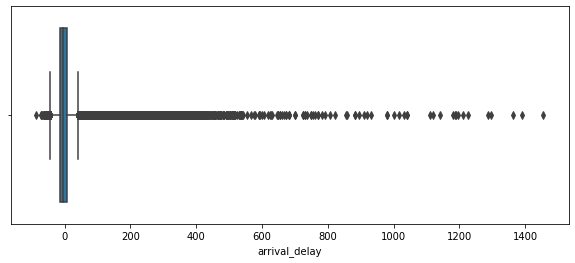

In [18]:
plt.figure(figsize=(10,4))
sb.boxplot(x=df_clean.arrival_delay);

- We could delete some of the outliers with very high delay, but for the moment we leave them, in case they have useful info
- We input a cero delay in the ones that departed earlier than the scheduled time, so they count as not delayed, that it´s what we are going to analyze

In [21]:
df_clean['arrival_delay'] = df_clean.arrival_delay.map(lambda x: 0 if x<0 else x)

In [22]:
df_clean.arrival_delay.describe()

count    269773.000000
mean         12.486298
std          36.263212
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max        1455.000000
Name: arrival_delay, dtype: float64

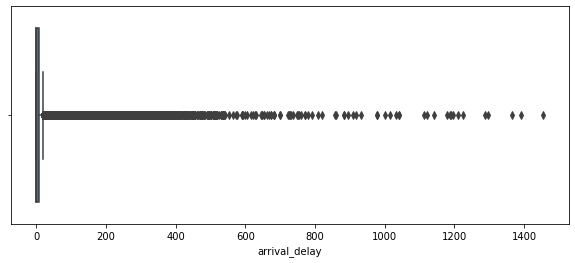

In [23]:
plt.figure(figsize=(10,4))
sb.boxplot(x=df_clean.arrival_delay);

In [24]:
print("The final shape of the database is",df_clean.shape)

The final shape of the database is (269773, 29)


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269773 entries, 0 to 274963
Data columns (total 29 columns):
year                   269773 non-null int64
month                  269773 non-null int64
day                    269773 non-null int64
day_of_week            269773 non-null int64
airline                269773 non-null object
flight_number          269773 non-null int64
tail_number            269773 non-null object
origin_airport         269773 non-null object
destination_airport    269773 non-null object
scheduled_departure    269773 non-null int64
departure_time         269773 non-null int32
departure_delay        269773 non-null int32
taxi_out               269773 non-null int32
wheels_off             269773 non-null int32
scheduled_time         269773 non-null int32
elapsed_time           269773 non-null int32
air_time               269773 non-null int32
distance               269773 non-null int64
wheels_on              269773 non-null int32
taxi_in                269773 

#### Airports database

We can see there are three airports without latitude and longitude. We are going to collect this data through Google Maps and fill it

In [70]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
IATA_CODE    322 non-null object
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [71]:
df_ap.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [74]:
df_ap[df_ap.longitude.isnull()]

,iata_code,airport,city,state,country,latitude,longitude
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [79]:
df_ap.set_value(96, 'latitude', 30.353873)
df_ap.set_value(96, 'longitude', -85.798894)
df_ap.set_value(234, 'latitude', 44.652411)
df_ap.set_value(234, 'longitude', -73.468458)
df_ap.set_value(313, 'latitude', 29.954715)
df_ap.set_value(313, 'longitude', -81.342849)

C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Telu Teruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Telu Teruno\Anaconda

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [80]:
df_ap.iloc[[96,234,313]]

,iata_code,airport,city,state,country,latitude,longitude
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,30.353873,-85.798894
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,44.652411,-73.468458
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,29.954715,-81.342849


In [81]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
iata_code    322 non-null object
airport      322 non-null object
city         322 non-null object
state        322 non-null object
country      322 non-null object
latitude     322 non-null float64
longitude    322 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


### <a class="anchor" id="Consolidaion_dataframes"> 3.- Consolidation of dataframes

In this section I´m going to consolidate both dataframes into files, that I´ll read for the next sections

In [82]:
df_clean.to_csv('flights_clean.csv', index = False)
df_ap.to_csv('airports_clean.csv', index = False)